In [1]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import os
import cv2
import sys
import matplotlib.pyplot as plt

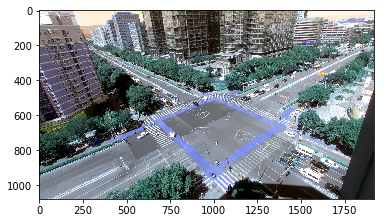

In [2]:
ROOT_DIR = os.path.abspath('../find_cross_pattern/')
IMG_DIR = os.path.join(ROOT_DIR,'pics\\')
IMG_PATH = os.path.join(IMG_DIR,'test.jpg')

img = cv2.imread(IMG_PATH,1)

[x,y,z]=img.shape
scale = 2
img=cv2.resize(img,(int(y/scale),int(x/scale)),interpolation=cv2.INTER_CUBIC)

plt.imshow(img)

In [3]:
#提取的颜色区间
h_low = 6/2
h_high =16/2

s_low = 36 * 255 / 100
s_high = 50 * 255 / 100

v_low = 84 * 255 / 100
v_high = 98 * 255 / 100

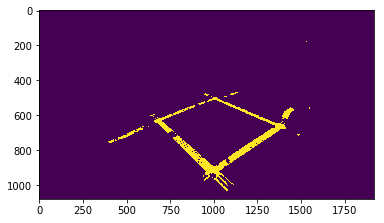

In [4]:
#转成hsv根据颜色提取有效区域
hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

lower_bound = np.array([h_low,s_low,v_low])
upper_bound = np.array([h_high,s_high,v_high])

hsv_img = cv2.inRange(hsv_img, lower_bound,upper_bound)

plt.imshow(hsv_img)

In [5]:
#开操作
#kernel=np.ones((3,3),np.uint8)
#opening = cv2.morphologyEx(hsv_img,cv2.MORPH_OPEN,kernel)
#plt.imshow(opening)

In [6]:
#闭操作
#kernel2=np.ones((5,5),np.uint8)
#closing = cv2.morphologyEx(hsv_img,cv2.MORPH_CLOSE,kernel2)
#plt.imshow(closing)

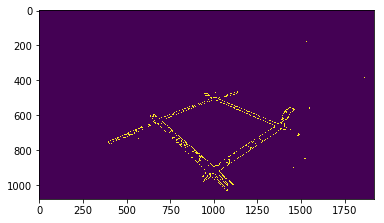

In [7]:
#sobel边缘检测

sobel_input = hsv_img

sobelX = cv2.Sobel(sobel_input,cv2.CV_64F,1,0)#x方向的梯度
sobelY = cv2.Sobel(sobel_input,cv2.CV_64F,0,1)#y方向的梯度

sobelX = np.uint8(np.absolute(sobelX))#x方向梯度的绝对值
sobelY = np.uint8(np.absolute(sobelY))#y方向梯度的绝对值

sobel = cv2.bitwise_or(sobelX,sobelY)
ret,b_sobel = cv2.threshold(sobel,10,20,cv2.THRESH_BINARY)
plt.imshow(b_sobel)


In [8]:
th1 = 19
th2 = 34
hough = 60

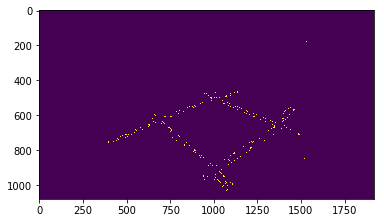

In [9]:
#canny边缘检测

canny = cv2.Canny(hsv_img,th1,th2)
dst = cv2.bitwise_and(img, img, mask=canny)
plt.imshow(canny)

In [10]:
lines = cv2.HoughLines(canny,1,np.pi/180,hough)
lines1 = lines[:,0,:]#提取为为二维
cnt=0
pairs = []
for rho,theta in lines1[:]: 
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a)) 
    pair = [x1,y1,x2,y2]
    pairs.append(pair)
    cv2.line(img,(x1,y1),(x2,y2),(255,0,0),1)
    cnt+=1
#print(pairs)
print(cnt)


108


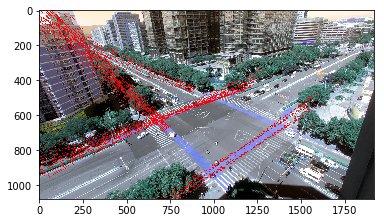

In [11]:
plt.imshow(img)

In [12]:
for i in range(cnt):
    for j in range(cnt):

    

SyntaxError: unexpected EOF while parsing (<ipython-input-12-8d33db78e551>, line 4)